In [1]:
#import library yang digunakan 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

import os

In [2]:
# mengidentifikasikan file/ data yang akan digunakan
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


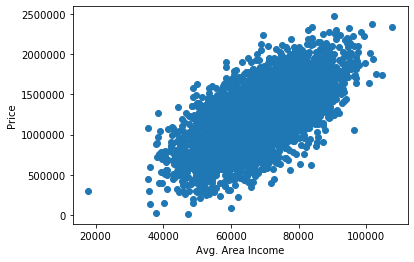

In [5]:

plt.scatter(df['Avg. Area Income'],df['Price'])
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

In [6]:
import numpy as np
area = df['Avg. Area Income']
harga = df['Price']


meanArea = np.mean(area)
meanHarga = np.mean(harga)
stdArea = np.std(area)
stdHarga = np.std(harga)

dataClean = df[(np.abs((df['Avg. Area Income']-meanArea)/stdArea) <= 3) & (np.abs((df['Price']-meanHarga)/stdHarga) <= 3)]

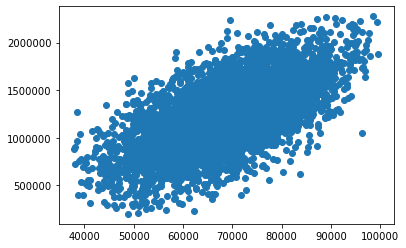

In [7]:
import matplotlib.pyplot as plt
plt.scatter(dataClean['Avg. Area Income'], dataClean['Price'])
plt.show()

In [8]:
P=dataClean.filter(items=['Avg. Area Income','Price'])
P.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


In [9]:
P=P.values

In [10]:
conda install -c districtdatalabs yellowbrick

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [12]:
## Menggunakan metode elbow untuk menentukan angka cluster yang tepat
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


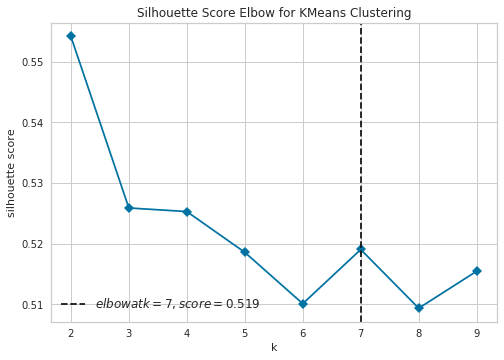

In [13]:
#fit data dan visualisasi
visualizer.fit(P)    
visualizer.poof()

In [14]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(P)

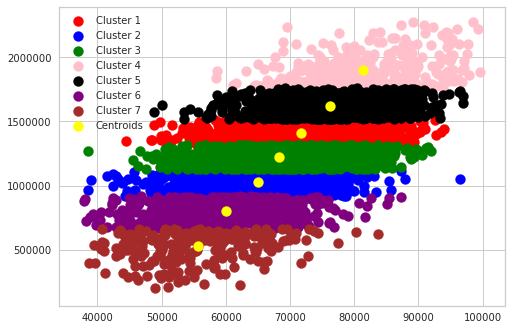

In [15]:
#Visualising the clusters
plt.scatter(P[y_kmeans == 0, 0], P[y_kmeans == 0, 1],   s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(P[y_kmeans == 1, 0], P[y_kmeans == 1, 1],   s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(P[y_kmeans == 2, 0], P[y_kmeans == 2, 1],   s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(P[y_kmeans == 3, 0], P[y_kmeans == 3, 1],   s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(P[y_kmeans == 4, 0], P[y_kmeans == 4, 1],   s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(P[y_kmeans == 5, 0], P[y_kmeans == 5, 1],   s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(P[y_kmeans == 6, 0], P[y_kmeans == 6, 1],   s = 100, c = 'brown', label = 'Cluster 7')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()